In [28]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math
import shapely
from shapely.geometry import LineString

In [23]:
s = gpd.read_file('data/streets-in-deleted-regions.csv')

In [24]:
s

,street_edge_id,geom,x1,y1,x2,y2,way_type,deleted,timestamp,geometry
0,4437,0102000020E61000000200000085FDE8E5C1975EC010CF...,-122.371199026451,47.5373738596049,-122.3712096,47.5391965,residential,t,2019-03-04 11:51:45.643298-08,None
1,7545,0102000020E61000000300000072FBE59395975EC0DBFE...,-122.3688926,47.5435652,-122.3685045,47.5437411,residential,t,2019-03-04 11:51:45.643298-08,None
2,13011,0102000020E610000003000000410BAE5EEA975EC03AD5...,-122.3737104,47.5483114,-122.3736798,47.5501417,residential,t,2019-03-04 11:51:45.643298-08,None
3,18934,0102000020E610000004000000AD776E90FF975EC00B23...,-122.3736798,47.5501417,-122.3749734,47.5501384,residential,t,2019-03-04 11:51:45.643298-08,None
4,18935,0102000020E610000003000000ADE584BF15985EC088FC...,-122.3749734,47.5501384,-122.3763274,47.5501476,residential,t,2019-03-04 11:51:45.643298-08,None
...,...,...,...,...,...,...,...,...,...,...
7897,26714,0102000020E6100000040000004FAE2990D9955EC07EE5...,-122.341391,47.7148568,-122.341404,47.7151635,residential,t,2019-03-04 11:51:45.643298-08,None
7898,26715,0102000020E6100000040000008509A359D9955EC05FA9...,-122.341404,47.7151635,-122.341391,47.7148568,residential,t,2019-03-04 11:51:45.643298-08,None
7899,26716,0102000020E610000004000000DAC29899BE955EC0DFC3...,-122.3394801,47.7159463,-122.3397583,47.7157525,residential,t,2019-03-04 11:51:45.643298-08,None
7900,26717,0102000020E61000000500000034EC9C0BC8955EC0C2DB...,-122.3413905,47.7155606,-122.3403348,47.715334,residential,t,2019-03-04 11:51:45.643298-08,None


In [25]:
# change type of x1,y1,x2,y2 to float
s['x1'] = s['x1'].astype(float)
s['y1'] = s['y1'].astype(float)
s['x2'] = s['x2'].astype(float)
s['y2'] = s['y2'].astype(float)

In [26]:
# create start and end points from x1, y1, x2, y2
s['start'] = s.apply(lambda x: Point(x['x1'], x['y1']), axis=1)
s['end'] = s.apply(lambda x: Point(x['x2'], x['y2']), axis=1)


In [29]:
#create a line geometry from start and end points
s['geometry'] = s.apply(lambda x: LineString([x['start'], x['end']]), axis=1)

In [30]:
s

,street_edge_id,geom,x1,y1,x2,y2,way_type,deleted,timestamp,geometry,start,end
0,4437,0102000020E61000000200000085FDE8E5C1975EC010CF...,-122.371199,47.537374,-122.371210,47.539197,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.37120 47.53737, -122.37121 47...",POINT (-122.37120 47.53737),POINT (-122.37121 47.53920)
1,7545,0102000020E61000000300000072FBE59395975EC0DBFE...,-122.368893,47.543565,-122.368505,47.543741,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.36889 47.54357, -122.36850 47...",POINT (-122.36889 47.54357),POINT (-122.36850 47.54374)
2,13011,0102000020E610000003000000410BAE5EEA975EC03AD5...,-122.373710,47.548311,-122.373680,47.550142,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.37371 47.54831, -122.37368 47...",POINT (-122.37371 47.54831),POINT (-122.37368 47.55014)
3,18934,0102000020E610000004000000AD776E90FF975EC00B23...,-122.373680,47.550142,-122.374973,47.550138,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.37368 47.55014, -122.37497 47...",POINT (-122.37368 47.55014),POINT (-122.37497 47.55014)
4,18935,0102000020E610000003000000ADE584BF15985EC088FC...,-122.374973,47.550138,-122.376327,47.550148,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.37497 47.55014, -122.37633 47...",POINT (-122.37497 47.55014),POINT (-122.37633 47.55015)
...,...,...,...,...,...,...,...,...,...,...,...,...
7897,26714,0102000020E6100000040000004FAE2990D9955EC07EE5...,-122.341391,47.714857,-122.341404,47.715164,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.34139 47.71486, -122.34140 47...",POINT (-122.34139 47.71486),POINT (-122.34140 47.71516)
7898,26715,0102000020E6100000040000008509A359D9955EC05FA9...,-122.341404,47.715164,-122.341391,47.714857,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.34140 47.71516, -122.34139 47...",POINT (-122.34140 47.71516),POINT (-122.34139 47.71486)
7899,26716,0102000020E610000004000000DAC29899BE955EC0DFC3...,-122.339480,47.715946,-122.339758,47.715753,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.33948 47.71595, -122.33976 47...",POINT (-122.33948 47.71595),POINT (-122.33976 47.71575)
7900,26717,0102000020E61000000500000034EC9C0BC8955EC0C2DB...,-122.341391,47.715561,-122.340335,47.715334,residential,t,2019-03-04 11:51:45.643298-08,"LINESTRING (-122.34139 47.71556, -122.34033 47...",POINT (-122.34139 47.71556),POINT (-122.34033 47.71533)


<AxesSubplot: >

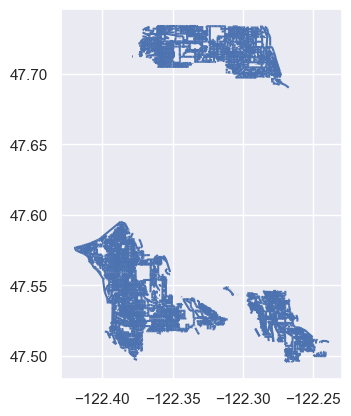

In [31]:
s.plot()